# **Dhruv Karmokar**
# **21BAI1604**

## Lab 5 - Linear Regression ( Applied On mtcars Dataset )

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df=pd.read_csv(r"/content/mtcars.csv")
print(df.shape)
print(df.info())
df

(32, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


52
335


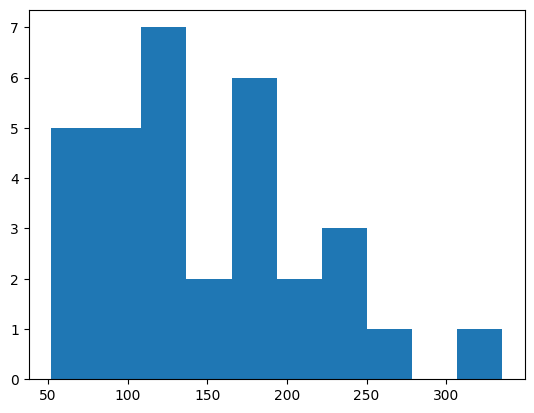

In [7]:
print(df['hp'].min())
print(df['hp'].max())
plt.hist(df['hp'])
plt.show()

# Draw Scatter Plot

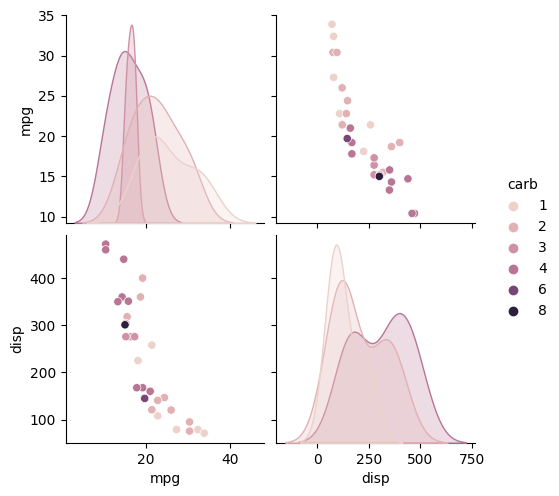

In [9]:
sb.pairplot(df,vars=['mpg','disp'],hue='carb')
#vars=['X','Y']


In [11]:
df.cyl.replace((4, 6, 8), ('four', 'six', 'eight'), inplace=True)
df.gear.replace((3, 4, 5), ('three', 'four', 'five'), inplace=True)
df.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,six,160.0,110,3.90,2.620,16.46,0,1,four,4
1,Mazda RX4 Wag,21.0,six,160.0,110,3.90,2.875,17.02,0,1,four,4
2,Datsun 710,22.8,four,108.0,93,3.85,2.320,18.61,1,1,four,1
3,Hornet 4 Drive,21.4,six,258.0,110,3.08,3.215,19.44,1,0,three,1
4,Hornet Sportabout,18.7,eight,360.0,175,3.15,3.440,17.02,0,0,three,2


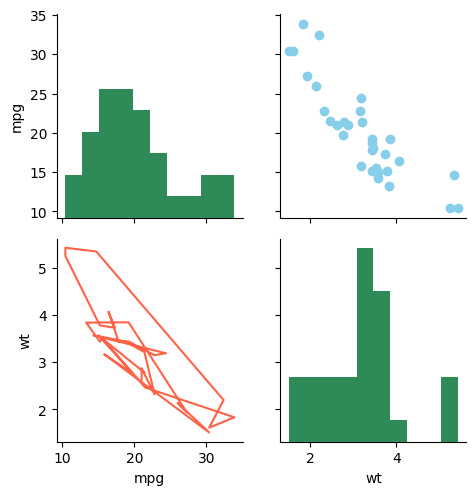

In [15]:
g = sb.PairGrid(data=df, vars=['mpg', 'wt'])
g.map_upper(plt.scatter, color='skyblue')
g.map_lower(plt.plot, color='tomato')
g.map_diag(plt.hist, color='seagreen')

<ipython-input-16-5e320d8dcce8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1=df.corr()


           mpg      disp        hp      drat        wt      qsec        vs  \
mpg   1.000000 -0.847551 -0.776168  0.681172 -0.867659  0.418684  0.664039   
disp -0.847551  1.000000  0.790949 -0.710214  0.887980 -0.433698 -0.710416   
hp   -0.776168  0.790949  1.000000 -0.448759  0.658748 -0.708223 -0.723097   
drat  0.681172 -0.710214 -0.448759  1.000000 -0.712441  0.091205  0.440278   
wt   -0.867659  0.887980  0.658748 -0.712441  1.000000 -0.174716 -0.554916   
qsec  0.418684 -0.433698 -0.708223  0.091205 -0.174716  1.000000  0.744535   
vs    0.664039 -0.710416 -0.723097  0.440278 -0.554916  0.744535  1.000000   
am    0.599832 -0.591227 -0.243204  0.712711 -0.692495 -0.229861  0.168345   
carb -0.550925  0.394977  0.749812 -0.090790  0.427606 -0.656249 -0.569607   

            am      carb  
mpg   0.599832 -0.550925  
disp -0.591227  0.394977  
hp   -0.243204  0.749812  
drat  0.712711 -0.090790  
wt   -0.692495  0.427606  
qsec -0.229861 -0.656249  
vs    0.168345 -0.569607  
am 

<Axes: >

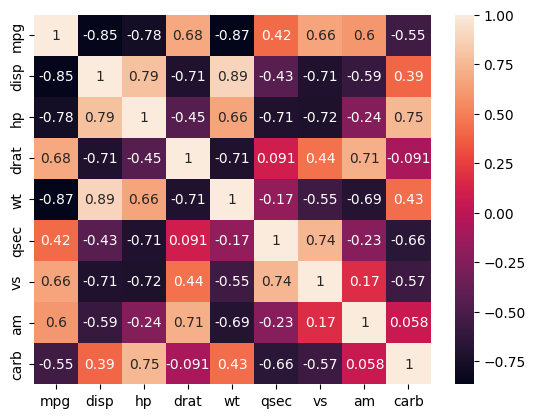

In [16]:
df1=df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [21]:
df['gear'].isnull().sum()
#df.isnull().sum()

0

In [28]:
df['Y'] = df['mpg'].where(df['mpg'] != 1, np.nan)

print(df.loc[df['mpg'] == 1].head())
print(df['Y'].isnull().sum())

Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb, Y]
Index: []
0


In [29]:
df.isnull().sum()
target=(df['Y'].mean())
print(target)
df.fillna(df['Y'].mean(),inplace=True)
df.isnull().sum()

20.090625000000003


model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
Y        0
dtype: int64

In [30]:
print(df[(df['mpg']==1)].count())


model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
Y        0
dtype: int64


In [33]:
target = df['Y'].mean()
print(target)

df.loc[df['carb'] > 90.0, 'Y'] = target
print(df['Y'].isnull().sum())

20.090625000000003
0


In [34]:
df.fillna(df['Y'].mean(),inplace = True)
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
Y        0
dtype: int64

In [35]:
print(df.columns)
print(df.shape)

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb', 'Y'],
      dtype='object')
(32, 13)


# Input and Output Splitting

In [36]:
from sklearn import linear_model
regress=linear_model.LinearRegression()
df2=df.values
print(df2)
train_x=(df2[:,0:12])
train_y=df2[:,12]
print(train_x.shape)
print(train_y.shape)

[['Mazda RX4' 21.0 'six' 160.0 110 21.0 2.62 16.46 0 1 'four' 4 21.0]
 ['Mazda RX4 Wag' 21.0 'six' 160.0 110 21.0 2.875 17.02 0 1 'four' 4 21.0]
 ['Datsun 710' 22.8 'four' 108.0 93 22.8 2.32 18.61 1 1 'four' 1 22.8]
 ['Hornet 4 Drive' 21.4 'six' 258.0 110 21.4 3.215 19.44 1 0 'three' 1
  21.4]
 ['Hornet Sportabout' 18.7 'eight' 360.0 175 18.7 3.44 17.02 0 0 'three'
  2 18.7]
 ['Valiant' 18.1 'six' 225.0 105 18.1 3.46 20.22 1 0 'three' 1 18.1]
 ['Duster 360' 14.3 'eight' 360.0 245 14.3 3.57 15.84 0 0 'three' 4 14.3]
 ['Merc 240D' 24.4 'four' 146.7 62 24.4 3.19 20.0 1 0 'four' 2 24.4]
 ['Merc 230' 22.8 'four' 140.8 95 22.8 3.15 22.9 1 0 'four' 2 22.8]
 ['Merc 280' 19.2 'six' 167.6 123 19.2 3.44 18.3 1 0 'four' 4 19.2]
 ['Merc 280C' 17.8 'six' 167.6 123 17.8 3.44 18.9 1 0 'four' 4 17.8]
 ['Merc 450SE' 16.4 'eight' 275.8 180 16.4 4.07 17.4 0 0 'three' 3 16.4]
 ['Merc 450SL' 17.3 'eight' 275.8 180 17.3 3.73 17.6 0 0 'three' 3 17.3]
 ['Merc 450SLC' 15.2 'eight' 275.8 180 15.2 3.78 18.0 0 0 '

# MinMax Normalization

In [44]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df.select_dtypes(include=[np.number]).columns
train_x_numerical = df[numerical_columns]

ms = MinMaxScaler()
train_x_scaled = ms.fit_transform(train_x_numerical)


# Regression Line Fitting

In [46]:
regress.fit(train_x_numerical,train_y)
#The coefficents y=m0x0+m1x1+...+m11x11+c
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)

Coefficients: [ 3.33333333e-01 -3.46944695e-17  2.94902991e-17  3.33333333e-01
 -3.40439482e-17 -4.20345182e-16 -2.33713331e-17 -8.49336877e-17
  3.23905399e-17  3.33333333e-01]
Intercept: 3.552713678800501e-15


# Prediction

In [48]:
y_predicted=regress.predict(train_x_numerical)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])

21.0 21.000000000000004
21.0 21.000000000000004
22.8 22.8
21.4 21.399999999999995
18.7 18.699999999999996
18.1 18.099999999999998
14.3 14.299999999999997
24.4 24.4
22.8 22.8
19.2 19.2
17.8 17.799999999999997
16.4 16.399999999999995
17.3 17.299999999999997
15.2 15.2
10.4 10.399999999999988
10.4 10.39999999999999
14.7 14.699999999999992
32.4 32.400000000000006
30.4 30.40000000000001
33.9 33.900000000000006
21.5 21.5
15.5 15.499999999999993
15.2 15.199999999999996
13.3 13.299999999999995
19.2 19.199999999999992
27.3 27.300000000000004
26.0 26.000000000000004
30.4 30.40000000000001
15.8 15.799999999999997
19.7 19.700000000000003
15.0 15.000000000000002
21.4 21.400000000000002


# Plotting

Text(0.5, 0, 'wt')

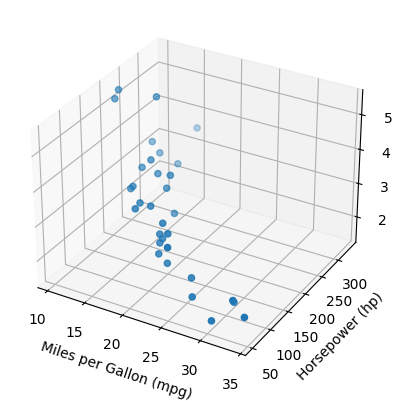

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['mpg'], df['hp'],df['wt'])
ax.set_xlabel('Miles per Gallon (mpg)')
ax.set_ylabel('Horsepower (hp)')
ax.set_zlabel('wt')


# Metrics

In [59]:
from sklearn import metrics
print('Mean Absolute error ', metrics.mean_absolute_error(train_y,y_predicted))
print('Mean Squared error ', metrics.mean_squared_error(train_y,y_predicted))
print('Root Mean Squared error ', np.sqrt(metrics.mean_squared_error(train_y,y_predicted)))

Mean Absolute error  4.385380947269368e-15
Mean Squared error  3.027253723785633e-29
Root Mean Squared error  5.502048458334071e-15
